In [15]:
from __future__ import division, print_function

In [16]:
import requests, bs4
from bs4 import BeautifulSoup as bs
import pandas as pd
from time import sleep
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import (cross_val_score, train_test_split, 
                                     KFold, GridSearchCV)

In [17]:
url = 'https://www.baseball-reference.com/teams/{}/2021.shtml'
team_list = ['ATL', 'PHI', 'NYM', 'MIA', 'WSN', 'MIL', 'STL', 'CIN', 'CHC',
            'PIT', 'SFG', 'LAD', 'SDP', 'COL', 'ARI', 'TBR', 'NYY', 'BOS',
            'TOR', 'BAL', 'CHW', 'CLE', 'DET', 'KCR', 'MIN', 'HOU', 'SEA', 
            'OAK', 'LAA', 'TEX']
url_list = []

for t in team_list:
    url = 'https://www.baseball-reference.com/teams/'+t+ '/2021.shtml'
    url_list.append(url)
for t in team_list:
    url = 'https://www.baseball-reference.com/teams/'+t+ '/2020.shtml'
    url_list.append(url)
for t in team_list:
    url = 'https://www.baseball-reference.com/teams/'+t+ '/2019.shtml'
    url_list.append(url)
    
# print(url_list)

In [18]:
def delete_let(a, b):
    num_let = a.count(b)
    i = 0
    while i < num_let:
        a.remove(b)
        i += 1
    return a



In [19]:
player_list = []

age_f = []
game_played_f = []
pa_f = []
at_bat_f = []
runs_f = []
hits_f = []
doubles_f = []
homeruns_f = []
so_f = []
bb_f = []
ba_f = []
rbi_f = []


for u in url_list:
    soup = bs(requests.get(u).text)

    spex = soup.find('tbody')

    #age
    age_tag = spex.find_all(attrs = {'data-stat' : 'age'})
    age = [t.text for t in age_tag]
    delete_let(age, 'Age')
    age_f.extend(age)
#     print(age)


    #Game played
    game_played_tag = spex.find_all(attrs = {'data-stat' : 'G'})
    game_played = [t.text for t in game_played_tag]
    delete_let(game_played, 'G')
    game_played_f.extend(game_played)
#     print(game_played)

    #Plate Appearances
    pa_tag = spex.find_all(attrs = {'data-stat' : 'PA'})
    pa = [t.text for t in pa_tag]
    delete_let(pa, 'PA')
    pa_f.extend(pa)
#     print(pa)

    #At Bats
    at_bat_tag = spex.find_all(attrs = {'data-stat' : 'AB'})
    at_bat = [t.text for t in at_bat_tag]
    delete_let(at_bat, 'AB')
    at_bat_f.extend(at_bat)
#     print(at_bat)

    #Runs Scored
    runs_tag = spex.find_all(attrs = {'data-stat' : 'R'})
    runs = [t.text for t in runs_tag]
    delete_let(runs, 'R')
    runs_f.extend(runs)
#     # print(runs)

    #Hits
    hits_tag = spex.find_all(attrs = {'data-stat' : 'H'})
    hits = [t.text for t in hits_tag]
    delete_let(hits, 'H')
    hits_f.extend(hits)
#     # print(hits)

    #Doubles Hit
    doubles_tag = spex.find_all(attrs = {'data-stat' : '2B'})
    doubles = [t.text for t in doubles_tag]
    delete_let(doubles, '2B')
    doubles_f.extend(doubles)
#     # print(doubles)

    #Home Runs
    homeruns_tag = spex.find_all(attrs = {'data-stat' : 'HR'})
    homeruns = [t.text for t in homeruns_tag]
    delete_let(homeruns, 'HR')
    homeruns_f.extend(homeruns)
#     # print(homeruns)

    #Runs Batted In
    rbi_tag = spex.find_all(attrs = {'data-stat' : 'RBI'})
    rbi = [t.text for t in rbi_tag]
    delete_let(rbi, 'RBI')
    rbi_f.extend(rbi)
#     print(rbi)

    #Strikeouts
    so_tag = spex.find_all(attrs = {'data-stat' : 'SO'})
    so = [t.text for t in so_tag]
    delete_let(so, 'SO')
    so_f.extend(so)
#     # print(so)

    #Bases on Balls
    bb_tag = spex.find_all(attrs = {'data-stat' : 'BB'})
    bb = [t.text for t in bb_tag]
    delete_let(bb, 'BB')
    bb_f.extend(bb)
#     # print(bb)

    #Batting Averages - target
    batting_avg_tag = spex.find_all(attrs = {'data-stat' : 'batting_avg'})
    batting_avg = [t.text for t in batting_avg_tag]
    delete_let(batting_avg, 'BA')
    ba_f.extend(batting_avg)
#     print(batting_avg)


    


In [20]:
## Cleaning at_bat data to make it standard

for i in range(0, len(at_bat_f)):
    if at_bat_f[i] == '':
        at_bat_f[i] = 'n/a'

# print(at_bat_f)

In [21]:
mlb_df = pd.DataFrame(list(zip(age_f, game_played_f, pa_f, at_bat_f, 
                              runs_f, hits_f, doubles_f, homeruns_f, rbi_f,
                              so_f, bb_f, ba_f)), 
                      columns = ['Age', 'Game_Played', 'PA', 'At_Bat',
                                'Run', 'Hit', 'Double', 'Homerun', 'RBI',
                                'SO', 'BB', 'BA'])

In [22]:
# mlb_df.head()
mlb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4633 entries, 0 to 4632
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          4633 non-null   object
 1   Game_Played  4633 non-null   object
 2   PA           4633 non-null   object
 3   At_Bat       4633 non-null   object
 4   Run          4633 non-null   object
 5   Hit          4633 non-null   object
 6   Double       4633 non-null   object
 7   Homerun      4633 non-null   object
 8   RBI          4633 non-null   object
 9   SO           4633 non-null   object
 10  BB           4633 non-null   object
 11  BA           4633 non-null   object
dtypes: object(12)
memory usage: 434.5+ KB


In [23]:
## Histogram of at_bat
mlb_df.hist(column = ['At_Bat'])

ValueError: hist method requires numerical or datetime columns, nothing to plot.

In [24]:
#data cleaning

mlb_df['At_Bat']
mlb_df = mlb_df.loc[mlb_df['At_Bat'] != 'n/a']
# mlb_df.info()

mlb_df['At_Bat'] = mlb_df['At_Bat'].astype(int)

mlb_df = mlb_df.loc[mlb_df['At_Bat'] >= 162]
mlb_df.head()

C:\Users\Wooyoung\AppData\Local\Temp/ipykernel_4892/1506332205.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mlb_df['At_Bat'] = mlb_df['At_Bat'].astype(int)


,Age,Game_Played,PA,At_Bat,Run,Hit,Double,Homerun,RBI,SO,BB,BA
0,32,60,229,209,21,46,14,7,26,53,17,.220
1,31,159,695,600,120,180,25,31,83,107,85,.300
2,24,156,686,629,103,163,40,30,106,128,47,.259
3,27,160,653,588,78,146,33,27,88,167,52,.248
4,24,160,662,590,91,179,33,33,107,168,52,.303


In [25]:
#Changing data typep of each columns

mlb_df['Age'] = mlb_df['Age'].astype(int)
mlb_df['Game_Played'] = mlb_df['Game_Played'].astype(int)
mlb_df['PA'] = mlb_df['PA'].astype(int)
mlb_df['Run'] = mlb_df['Run'].astype(int)
mlb_df['Hit'] = mlb_df['Hit'].astype(int)
mlb_df['Double'] = mlb_df['Double'].astype(int)
mlb_df['Homerun'] = mlb_df['Homerun'].astype(int)
mlb_df['RBI'] = mlb_df['RBI'].astype(int)
mlb_df['SO'] = mlb_df['SO'].astype(int)
mlb_df['BB'] = mlb_df['BB'].astype(int)
mlb_df['BA'] = mlb_df['BA'].astype(float)

mlb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 906 entries, 0 to 4593
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          906 non-null    int32  
 1   Game_Played  906 non-null    int32  
 2   PA           906 non-null    int32  
 3   At_Bat       906 non-null    int32  
 4   Run          906 non-null    int32  
 5   Hit          906 non-null    int32  
 6   Double       906 non-null    int32  
 7   Homerun      906 non-null    int32  
 8   RBI          906 non-null    int32  
 9   SO           906 non-null    int32  
 10  BB           906 non-null    int32  
 11  BA           906 non-null    float64
dtypes: float64(1), int32(11)
memory usage: 53.1 KB


In [26]:
# Linear Regression

x = mlb_df.drop(columns = 'BA')
x = sm.add_constant(x)
y = mlb_df['BA']

model = sm.OLS(y, x, data = mlb_df)
record_model = model.fit()
record_model.summary()

C:\Users\Wooyoung\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     BA   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     473.5
Date:                Tue, 25 Jan 2022   Prob (F-statistic):               0.00
Time:                        19:24:54   Log-Likelihood:                 2632.8
No. Observations:                 906   AIC:                            -5242.
Df Residuals:                     894   BIC:                            -5184.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2506      0.004     64.870      0.000       0.243       0.258
Age             0.0002      0.000      1.502      0.133   -5.93e-05       0.000
Game_Played  -4.25e-05   3.73e-05     -1.139      0.255      -0.000    3.08e-05
PA           1.294e-05      0.000      0.123      0.902      -0.000       0.000
At_Bat         -0.0007      0.000     -6.857      0.000      -0.001      -0.001
Run            -0.0001   7.09e-05     -2.051      0.041      -0.000   -6.24e-06
Hit             0.0029   6.09e-05     47.222      0.000       0.003       0.003
Double       9.614e-05      0.000      0.872      0.384      -0.000       0.000
Homerun      4.541e-05      0.000      0.323      0.747      -0.000       0.000
RBI          5.855e-06   6.45e-05      0.091      0.928      -0.000       0.000
SO           1.939e-05   2.45e-05      0.790      0.430   -2.88e-05    6.76e-05
BB           3.169e-05      0.000      0.290      0.772      -0.000       0.000
==============================================================================
Omnibus:                       43.668   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.679
Skew:                          -0.395   Prob(JB):                     2.01e-15
Kurtosis:                       4.081   Cond. No.                     5.12e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

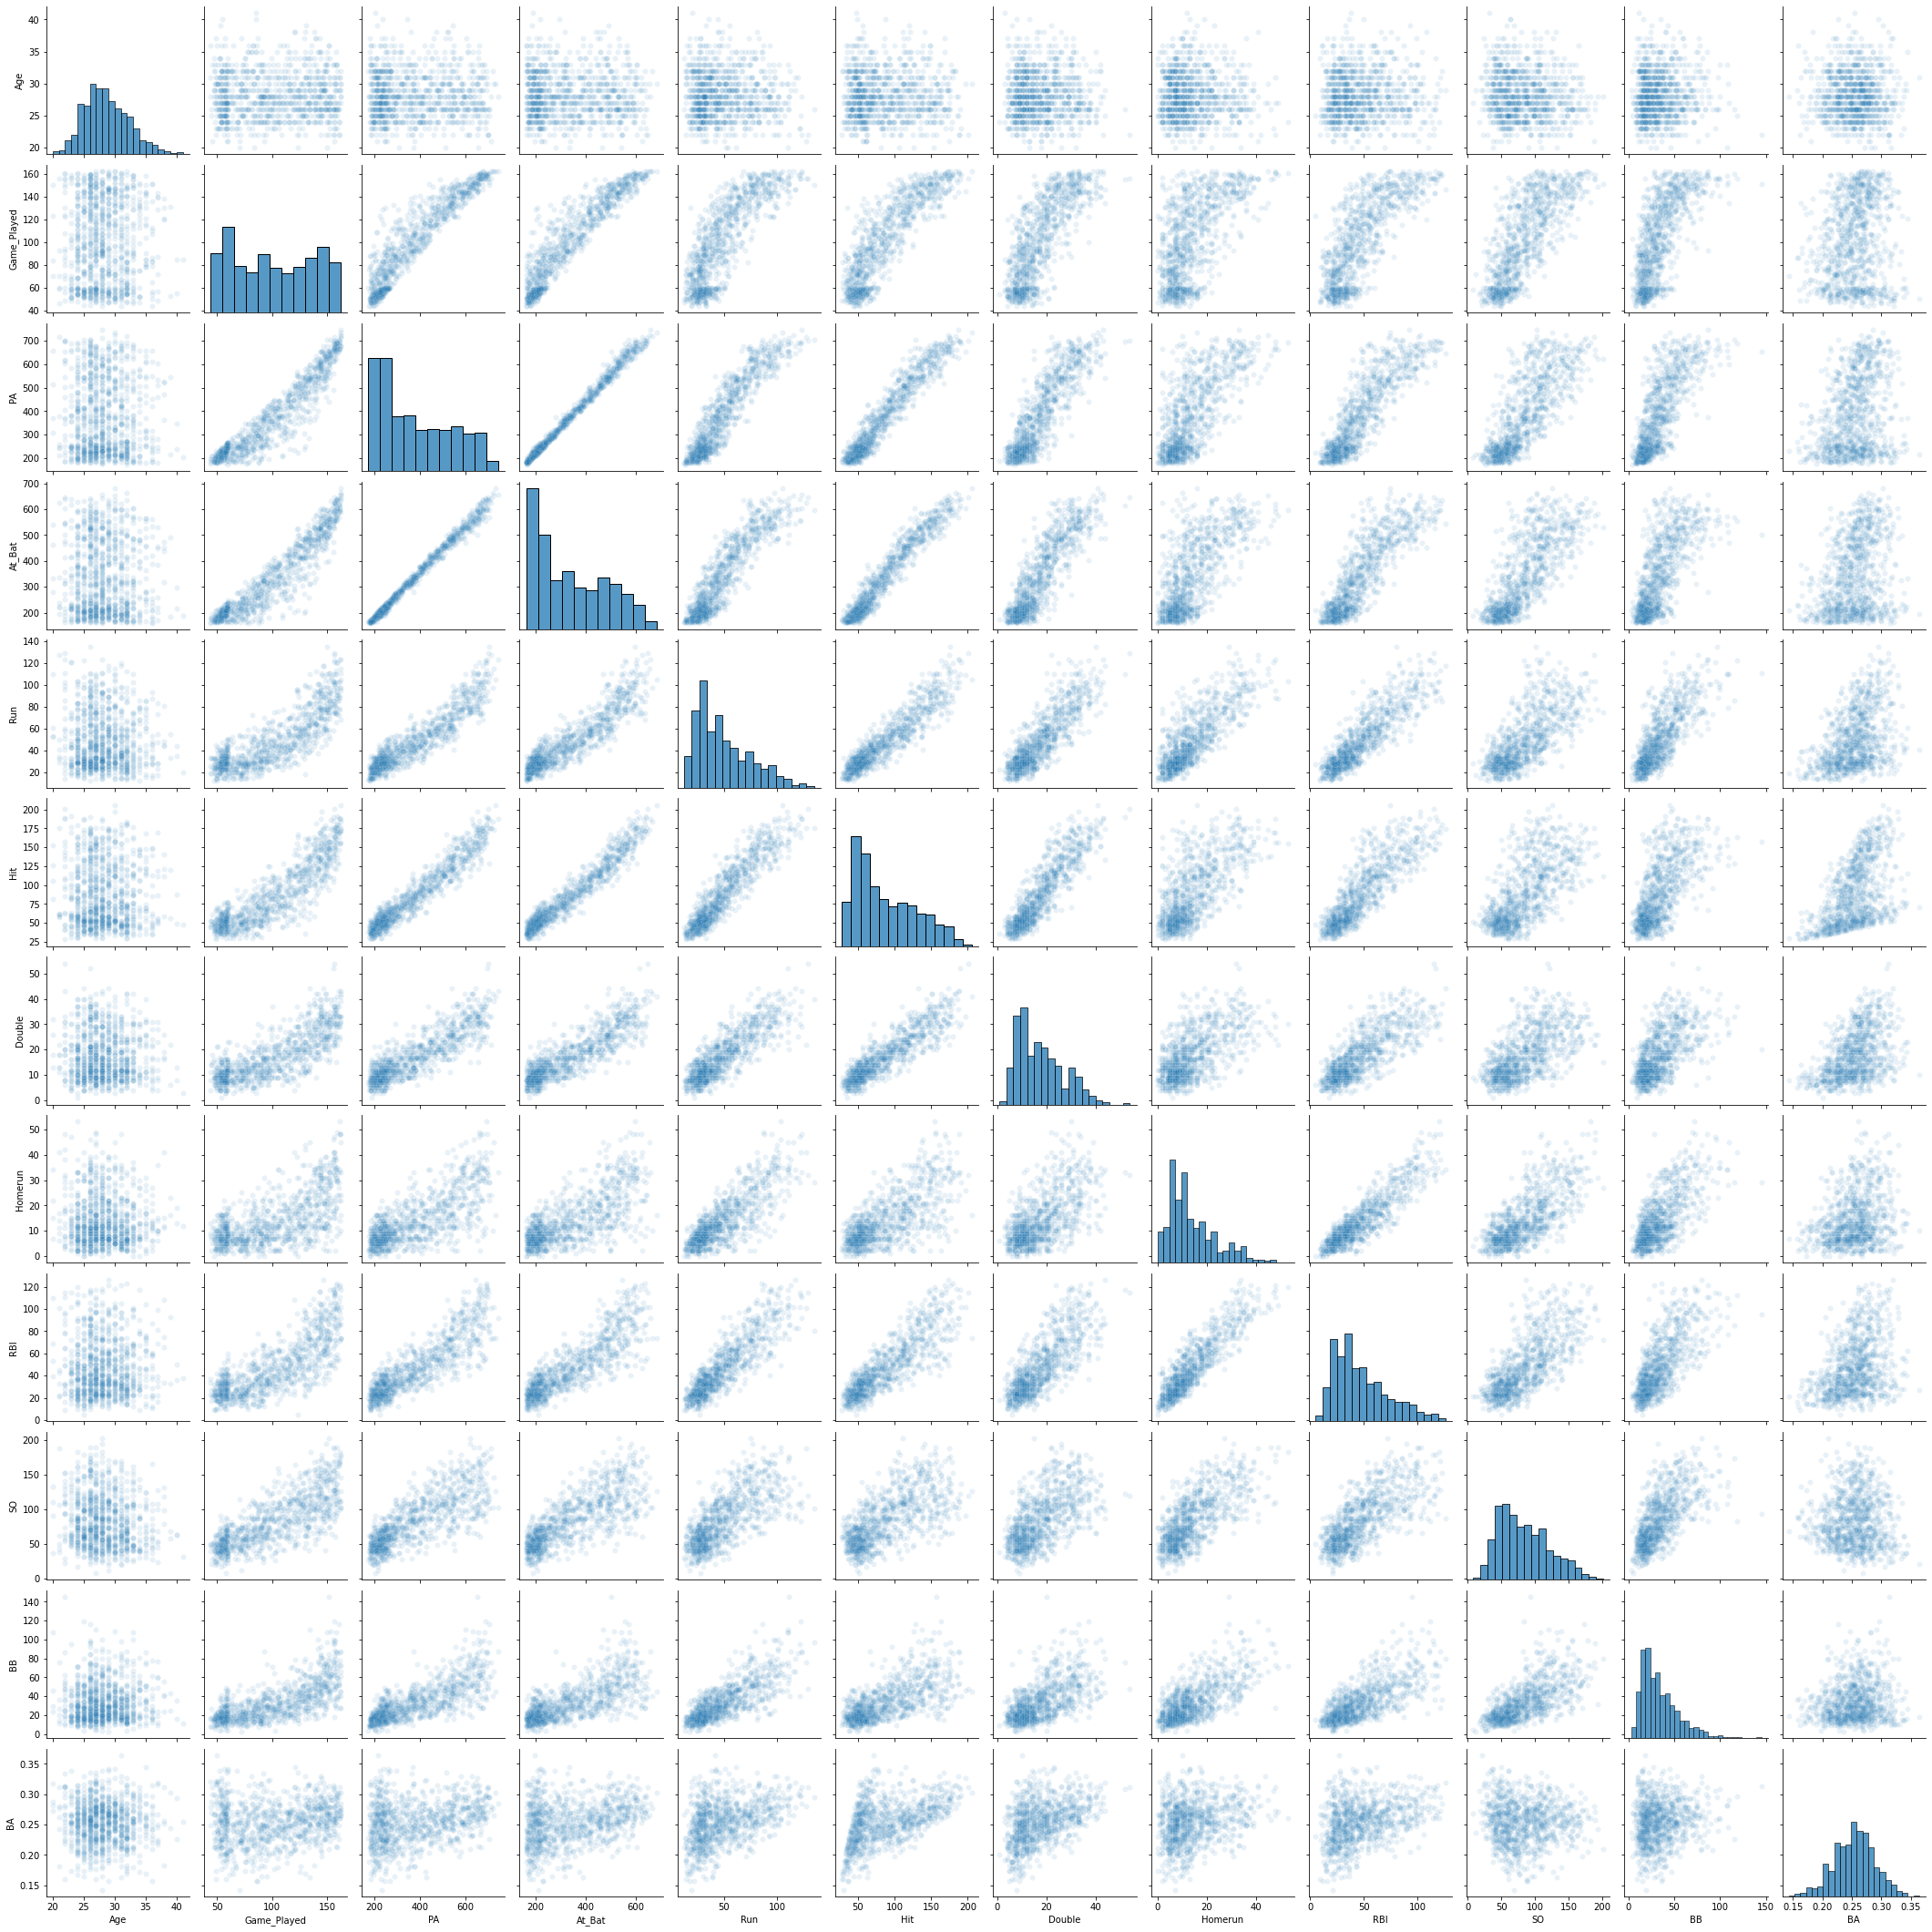

In [13]:
#Pair plot

sns.pairplot(mlb_df, plot_kws = {'alpha' : 0.1})

Text(0.5, 1.0, 'Correlation Heat Map')

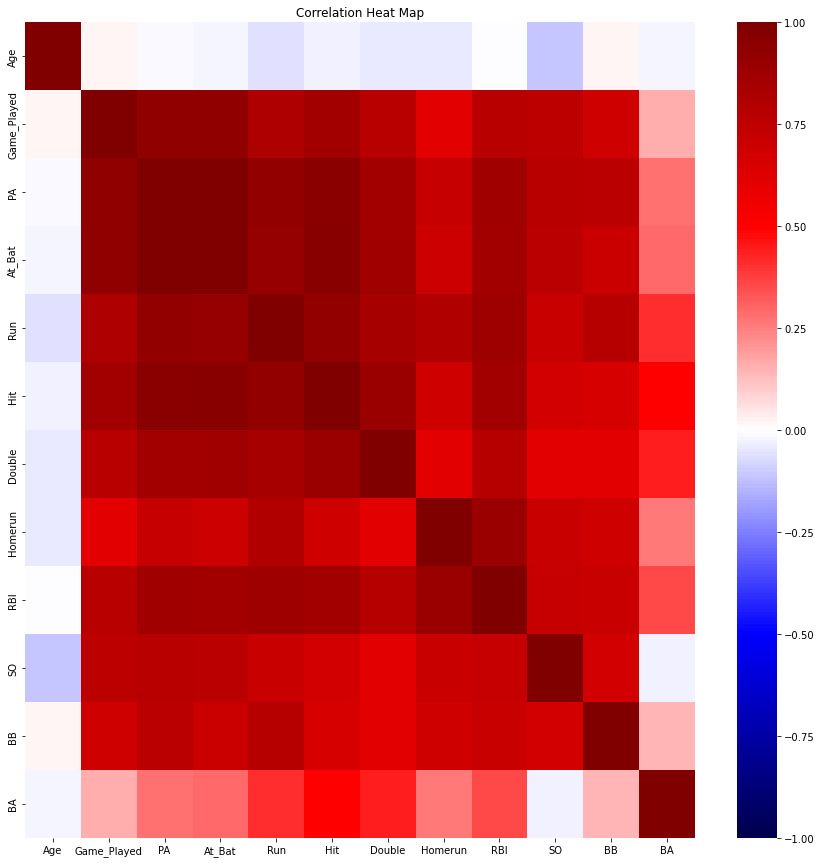

In [27]:
### Heatmap to find the correlation with targaet

fig, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(mlb_df.corr(), cmap = 'seismic', vmin = -1, ax = ax).set_title("Correlation Heat Map")

Text(0.5, 1.0, "Cook's Distance Plot")

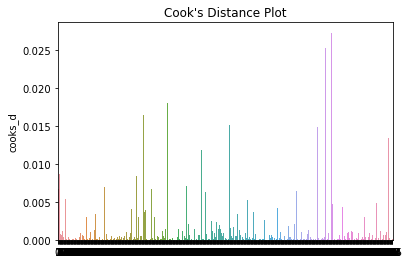

In [28]:
### Finding Cook's Distance to check the relationship
influence = record_model.get_influence()
influence_frame = influence.summary_frame().reset_index()

sns.barplot(y = 'cooks_d',
           x = influence_frame.index,
           data = influence_frame).set_title("Cook's Distance Plot")



In [29]:
X = mlb_df.drop(columns = ['BA'])
y = mlb_df['BA']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size = .3, 
                                                   random_state = 42)

model = LinearRegression()
lr = model.fit(X_train, y_train)

r_squared_train = lr.score(X_train, y_train)
r_squared_test = lr.score(X_test, y_test)

print(r_squared_train)
print(r_squared_test)

0.851228021444416
0.8571233850857276


[0.86298533 0.83332065 0.85985205 0.81390379 0.8499534 ]


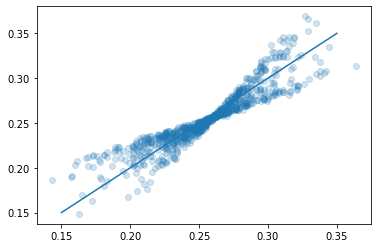

In [30]:
## BUilding model set with spliting 

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size = .1, 
                                                   random_state = 42)
kfold = KFold(n_splits = 5, shuffle = True, random_state = 0)

model = LinearRegression()

scores = cross_val_score(model, X_train, y_train, cv = kfold)
print(scores)

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)

plt.scatter(y_train, y_train_pred, alpha = 0.2)
plt.plot([0.15, 0.35], [0.15,0.35])

In [32]:
#Recalculating values with dropping columns
mlb_df_drop = mlb_df.drop(columns = ['Homerun', 'RBI', 'PA', 'SO', 'BB'])

x = mlb_df_drop.drop(columns = 'BA')
x = sm.add_constant(x)
y = mlb_df_drop['BA']

model = sm.OLS(y, x, data = mlb_df_drop)
record_model = model.fit()
record_model.summary()







C:\Users\Wooyoung\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     BA   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     869.0
Date:                Tue, 25 Jan 2022   Prob (F-statistic):               0.00
Time:                        19:25:35   Log-Likelihood:                 2631.1
No. Observations:                 906   AIC:                            -5248.
Df Residuals:                     899   BIC:                            -5215.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2506      0.004     67.551      0.000       0.243       0.258
Age             0.0002      0.000      1.559      0.119   -5.02e-05       0.000
Game_Played -3.437e-05    3.6e-05     -0.954      0.340      -0.000    3.63e-05
At_Bat         -0.0007   1.78e-05    -40.436      0.000      -0.001      -0.001
Run         -6.785e-05   4.72e-05     -1.438      0.151      -0.000    2.47e-05
Hit             0.0028   5.07e-05     55.746      0.000       0.003       0.003
Double       7.965e-05      0.000      0.742      0.458      -0.000       0.000
==============================================================================
Omnibus:                       43.364   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.794
Skew:                          -0.390   Prob(JB):                     1.90e-15
Kurtosis:                       4.090   Cond. No.                     3.36e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
# rmse calculation

residuals = record_model.predict(x) - y
rmse = np.sqrt(sum(residuals**2)/len(residuals))
print(rmse)

mae = sum(abs(record_model.predict(x) - y))/len(y)
print(mae)

0.013259844063925512
0.009885577154832197


In [33]:
#Validation to find r^2

X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                   test_size = .3, 
                                                   random_state = 42)

model = LinearRegression()
lr = model.fit(X_train, y_train)

r_squared_train = lr.score(X_train, y_train)
r_squared_test = lr.score(X_test, y_test)

print(r_squared_train)
print(r_squared_test)

0.8509725030911189
0.8562574466329149


[0.86511663 0.83450093 0.86003295 0.82072148 0.85017384]


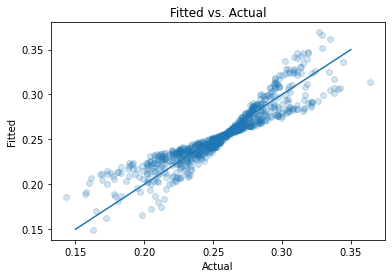

In [32]:
## Actual vs Fitted graph

X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                   test_size = .1, 
                                                   random_state = 42)
kfold = KFold(n_splits = 5, shuffle = True, random_state = 0)

model = LinearRegression()

scores = cross_val_score(model, X_train, y_train, cv = kfold)
print(scores)

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)

plt.scatter(y_train, y_train_pred, alpha = 0.2)
plt.title('Fitted vs. Actual')
plt.xlabel('Actual')
plt.ylabel('Fitted')

plt.plot([0.15, 0.35], [0.15,0.35])